<a href="https://colab.research.google.com/github/alimoorreza/CS167-fall24-notes/blob/main/Day03_Pandas_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day03
## Practicing with Pandas

#### CS167: Machine Learning, Fall 2024


📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_fall24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_fall24/cs167_syllabus_fall24.pdf)

## Before we get started:
- Download the data from Blackboard and put it in your google drive. (https://drive.google.com/)
    - Titanic Dataset `titanic.csv`
    - Penguin Dataset `penguins_size.csv`
- Be sure you connect your notebook to your Drive (mount your drive)

# Pandas Review:

Subsetting Columns

Subsetting Rows

Subsetting Rows and Columns

Helpful Functions

In [1]:
#connect your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
path = '/content/drive/MyDrive/cs167_fall24/datasets/restaurant.csv'
restaurant_data = pd.read_csv(path)
print('data is a ', type(restaurant_data))
restaurant_data.head()

data is a  <class 'pandas.core.frame.DataFrame'>


,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


# Subsetting Columns

---


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24//notes/images/day02_subset_cols.png"/ width=600>
</div>

Why might we want a subset of the columns of a DataFrame?

Sometimes you don't need all of the columns and just want to work with a __subset__ of the colummns of the original dataset. Other times, you may want to reorder the columns in your dataset.

Here's how you would do either of those:
The syntax for subsetting columns from a DataFrame (`df`) is:
- One column: `df['column_name']`
- Multiple columns: `df[['column1', 'column2', 'target']]`

So, if we wanted to look at the `price` column, we could do:

In [10]:
prices = restaurant_data['price']
prices

,price
0,$$$
1,$
2,$
3,$
4,$$$
5,$$
6,$
7,$$
8,$
9,$$$


## Column Subset Example:

Imagine you want to only work with `'rain'`, `'hun'`, and `'target'` from the 'restaurant' dataset:


In [11]:
prices = restaurant_data[[ 'rain','hun','target']]
prices


,rain,hun,target
0,No,Yes,Yes
1,No,Yes,No
2,No,No,Yes
3,No,Yes,Yes
4,No,No,No
5,Yes,Yes,Yes
6,Yes,No,No
7,Yes,Yes,Yes
8,Yes,No,No
9,No,Yes,No


Maybe you want to re-order your new subset so that `rain` and `hun` are switched:

In [12]:
reordered = restaurant_data[['hun', 'rain', 'target']]
reordered.head()

,hun,rain,target
0,Yes,No,Yes
1,Yes,No,No
2,No,No,Yes
3,Yes,No,Yes
4,No,No,No


In [32]:
import pandas as pd
titanic = pd.read_csv('/content/drive/MyDrive/cs167_fall24/datasets/titanic.csv') #make sure the path on the line below corresponds to the path where you put your dataset.
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 💬 Group Exercise:

Download the Titanic Dataset from Blackboard, upload it to a spot in your GoogleDrive; you might have already done so by now.

See if you can make the following subsets:
- make a subset called `ages` that holds the ages of the passengers on the titanic
- create a subset called `titanic_subset` with the columns `survived`, `deck`, `sex`, and `age`, in that order.

In [ ]:
# your code
# ...

## Subsetting Rows in a DataFrame:
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24/notes/images/day02_subset_rows.png"/ width=600>
</div>
Why might you want a subset of the rows?

Maybe you want only rows that satisfy a certain condition--in the restaurant dataset, maybe:
- Italian Restaurants
- only examples when it didn't rain
- etc.

## Syntax to Subset Rows:

Usually when subsetting rows, we're using **conditions**.

Remember: when we apply a condition to a DataFrame, the result is a Series of Boolean values:

In [ ]:
titanic.survived == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

In [ ]:
survivors = titanic[titanic.survived == 1]
survivors.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 💬 Group Exercise:

See if you can create a subset called rainy_day, of rows where it rained from the dataset ’restaurant.csv’

In [ ]:
# your code
# ...

## Subsetting Columns and Rows

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24/notes/images/day02_subset_rowsandcols.png"/ width=500>
</div>

Let's imagine we want a subset that contains the ages of people who did not survive the Titanic.

Techincally, you have the knowledge now to be able to do this, if you just break it up into two steps
- make a subset, `victims`, of rows where `survived == 0`
- use `victims` to create a second subset that only contains the `'Age'` and `Sex` column.

## One way:

1. Subset the rows
2. Use the subset that you end up with from step 1, and take a subset of it to end up with the final subset.

In [16]:
# Step 1: subset rows
victims = titanic[titanic.survived==0]

# Step 2: use the subset (of rows) we created and take a subset (of columns) of it
subset = victims[['age', 'sex', 'survived']]
subset.head()

,age,sex,survived
0,22.0,male,0
4,35.0,male,0
5,NaN,male,0
6,54.0,male,0
7,2.0,male,0


# Another way:
Use **loc** property of DataFrame with 2 indices:
> first index stands for selecting the rows

> while the second stands for indexing the columns



In [25]:
condition = titanic.survived == 0
subset = titanic.loc[condition, "age"]
subset.head()

,age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0


In [23]:
# in a single step:
subset = titanic.loc[titanic.survived == 0, "age"] # use just the column name
subset.head()

,age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0


In [28]:
# selecting multiple columns
titanic_victims = titanic.loc[titanic.survived==0, ["fare", "age"]] # use a list of column names
titanic_victims.head()

,fare,age
0,7.2500,22.0
4,8.0500,35.0
5,8.4583,NaN
6,51.8625,54.0
7,21.0750,2.0


# One more way:
Use **[ ][ ]** property of DataFrame with 2 pairs of brackets for indexing:
> first **[ ]** stands for selecting the rows

> while the second **[ ]**  for selecting the columns



In [29]:
titanic_victims = titanic[titanic.survived==0]["age"]
titanic_victims.head()


,age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0


In [31]:
# selecting multiple columns
titanic_victims = titanic[titanic.survived==0][["fare", "age"]]
titanic_victims.head()


,fare,age
0,7.2500,22.0
4,8.0500,35.0
5,8.4583,NaN
6,51.8625,54.0
7,21.0750,2.0


## 💬 Group Exercise:
Try the above approaches using a different subset of columns

> Step 1 (Row Selection): make a subset, survived, of rows where survived == 1

> Step 2 (Column Selection): use survived to create a second subset that only contains the *'pclass'* and *'embark_town'* columns.


In [ ]:
# your code
# ...

# Multiple Conditions
What if we want to filter rows by multiple conditions?

Make sure each condition is in parentheses and use the old school `|` and `&` for operators.

In [ ]:
#women and children on titanic
women_and_children = titanic[(titanic.age < 18) | (titanic.sex == 'female')]
women_and_children.shape[0]
women_and_children.survived.sum()

256

In [ ]:
# men who survived
men_who_survived = titanic[(titanic.sex == 'male') & (titanic.survived == 1)]
men_who_survived.shape[0]
men_who_survived.age.mean()

27.276021505376345

## Some Handy Functions
- `mean()`, `median()`, `sum()`

In [ ]:
#average age of titanic passengers:
titanic.age.mean()
#titanic['age'].mean()

29.69911764705882

In [ ]:
#median ticket fare for titanic passengers:
titanic.fare.median()

14.4542

In [ ]:
#number of survivors
titanic.survived.sum()
total_num_people = titanic.shape[0]
did_not_survive= total_num_people - titanic.survived.sum()
did_not_survive

549

# Handy Functions:
- `describe()`, `hist()`, `groupby()`, `unique()`

In [ ]:
#get the unique values of the Deck column
titanic.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [36]:
# groupby() is useful as it bypasses the same calculation for multiple groups
# group#0
survivor_0_ages = titanic[titanic.survived == 0]["age"]
survivor_0_ages.mean()

30.62617924528302

In [38]:
# group#1
survivor_1_ages = titanic[titanic.survived == 1]["age"]
survivor_1_ages.mean()

28.343689655172415

###**It can be done simply by using groupby() method as follows**

In [39]:
titanic.groupby(['survived'])['age'].mean()

,age
survived,
0,30.626179
1,28.343690


<Axes: >

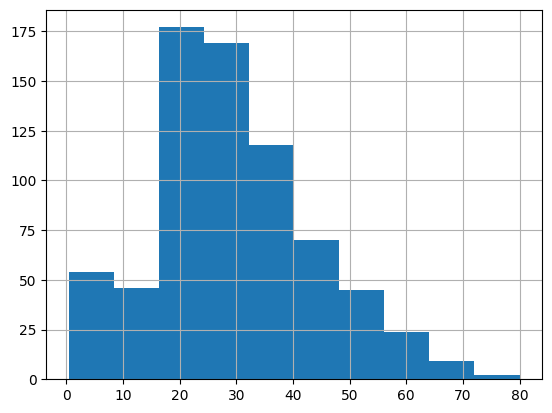

In [40]:
titanic.age.hist()

In [41]:
titanic.age.describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


# Pandas Practice Exercises
These are some exercises for you to practice playing around with pandas.
- these are not going to be turned in, they're just practice.
- I'll post solutions tonight

I hope these exercises will leave you in a good spot to tackle Notebook #1.

## Let's get started
Before you begin, make sure that you download the data from Blackboard and put it in your Google Dive wher eyou know how to find it (preferable in a datasets folder).

In [ ]:
#selecting columns in dataframes
import pandas
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
titanic = pd.read_csv('/content/drive/MyDrive/cs167_fall24/datasets/titanic.csv') #make sure the path on the line below corresponds to the path where you put your dataset.
titanic.head()

In [ ]:
# what is the data type of titanic?


In [ ]:
# what are the features (column titles) of the titanic dataset?


In [ ]:
# display only the 'embark_town' column of the titanic data


In [ ]:
# what is the data type of the result of the previous cell?


In [ ]:
# what is the "shape" of the data frame?


In [ ]:
# make a subset (call the variable 'subset') of the data that consists of the last 20 rows of the data;
# verify that your subset has 20 rows


In [ ]:
# use loc to print out the data for passenger 890 on the titanic dataframe
# use iloc to print out the data for passenger 890 on the subest dataframe


In [ ]:
# use a markdown cell; describe the difference between loc and iloc

In [ ]:
# create a subset of the data (call the variable 'queenstown_subset') that consists only of passengers with
# a 'embark_town' that is "Queenstown"
# hint: if you get a warning, you may need to explicitly note that you are making a copy of the original data by using
# the .copy() function

In [ ]:
# how many passengers are in queenstown_subset?

In [ ]:
# what is the average fare for all of those in the queenstown_subset?

In [ ]:
# what is the average age for all of those in the queenstown_subset?
# do all of the passengers have an age recorded? What is recorded if there is no age?

In [ ]:
# What does unique(), mean(), isnull(), and fillna() do? Use a markdown cell to write your answers
# Use the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

In [ ]:
# give examples of your use of unique(), mean(), median(), isnull()

In [ ]:
# in the queenstown_subet dataframe
# for each row that does not have an age recorded, replace the NaN value with the calculated average
# hint: don't use a loop; it can be done in 1 line of code using fillna()

## Load in the Penguin Dataset:

This is a new dataset, here's the source: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24/notes/images/day03_penguin.png"/ width=500>
</div>

In [21]:
#make sure the path on the line below corresponds to the path where you put your dataset.
penguin = pd.read_csv('/content/drive/MyDrive/cs167_fall24/datasets/penguins_size.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# make a histogram of the different species of penguins

# which species of penguin has the most rows in this dataset?


In [ ]:
#find the average culmen length for each species of penguin.

# Can you do this in one line? Try using the groupby function (look back at notes)
penguin.groupby(['species'])['culmen_length_mm'].mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: culmen_length_mm, dtype: float64

In [ ]:
# find the number of Adelie penguins from Torgersen
# ...

In [ ]:
# what is the percentage of female penguins in the dataset?
# ...

In [ ]:
# what is the average weight of male penguins? What about female penguins?
# ...

In [ ]:
# Which species of penguin is the heaviest? Which is the smallest?
# ...

# look into the documentation and see what the following functions do:
# min(), max(), idxmax()
# see if you can use them to help answer the question
# ...

In [ ]:
# come up with 2 of your own questions that you think you can answer with the penguin dataset,
# and use the tools you have to answer them.
# ...